# <b>SA54 Python/Machine Learning CA Workshop 1</b>
### <b>K-NN and Decision Tree Models for Heart Disease Prediction</b>

##### <b>SA 54 Team 3</b></br>
Cheong Wei Ming Marcus - A0124816H<br>
Kolanjhikannan Akshayahasinee – A0249484N<br>
Htoo Eain Si Lwin – A0249489E<br>
Gabriel Chua Reyes – A0249469J<br>
Jithin Krishnan – A0249481W<br>
Tian Shuang – A0249479H

### <b>1. Background</b>

Heart disease is one of the most common causes of death for people in the US. Due to a generally unhealthy lifestyle in the country (smoking, unhealthy diet, not enough physical activity), heart disease has become a common concern for adults, and ways to discover whether someone is at risk are currently being developed. The dataset that will be used in this study comes from the 2020 annual CDC survey, which has collected medical and health data from more than 400,000 adults in the US. The data set already cleanned to include only most relevent factors as per the description in the Kraggle by the originators.

### <b>2. Problem Statement</b>

The project aims to establish classification models with K-nearest Neighbors Algorithm and Decision Tree algorithm to predict if a person would get heart disease with the given factors with atleast 85 % accuracy.


### <b>3. Data Dictionary</b>

The dataset that will be used for this exercise will be the Personal Key Indicators of Heart Disease (https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease).

##### Features

| Column Name | Data Type | Definition and Business Rules |
| --- | --- | --- | 
| BMI | Float | Body Mass Index |
| Smoking | Boolean | Whether the person has smoked at least 100 cigarettes in their lifetime |
| AlcoholDrinking | Boolean | Whether the person drinks 14 (Men)/ 7 (Women) time a week |
| Stroke | Boolean | Whether the person has experienced a stroke |
| PhysicalHealth | Integer | Out of the last 30 days, how many days has the person's physical health not felt good (0-30) |
| MentalHealth | Integer | Out of the last 30 days, how many days has the person's mental health not felt good (0-30) |
| DiffWalking | Boolean | Whether the person finds it difficult to walk or climb stairs |
| Sex | String | Male/Female |
| AgeCategory | String | Age range of person |
| Race | String | Race/Ethnicity |
| Diabetic | Boolean | Whether the person has had diabetes or not |
| PhysicalActivity | Boolean | Whether the person performed physical activities outside their job for the past 30 days |
| GenHealth | String | Description of person's general health |
| SleepTime | Integer | How many hours of sleep does the person get over a 24-hour period |
| Asthma | Boolean | Whether the person has had asthma or not |
| KidneyDisease | Boolean | Whether the person has had kidney disease or not  |
| SkinCancer | Boolean | Whether the person has had skin cancer or not |
															

##### Label

| Column Name | Data Type | Definition and Business Rules |
| --- | --- | --- |
| HeartDisease | Boolean | Whether the person has had heart disease before and may develop complications in the future |

### <b>4. Importing Packages & Data</b>

First, the team imports the necessary packages to process the data and build the model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from timeit import default_timer as timer
from datetime import timedelta

Then, using the Pandas package, the dataset is saved into a DataFrame.

In [2]:
path = "heart_2020_cleaned.csv"
df = pd.read_csv(path)

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


#### <b>5. Pre-processing of Data</b>

##### 5.1 Data endoding to have unique values



In [3]:
#save the unique values inside the column into an array
columns = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic",
                    "PhysicalActivity", "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"]


def setUnique(columnName):
    category_array = df[columnName].unique()
    category_array = sorted(set(category_array))

    categoryDict = {}

    if columnName == "GenHealth":
        categoryDict = {0: 'Poor', 1: 'Fair', 2: 'Good', 3: 'Very good', 4: 'Excellent'}
        category_array = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']


    for i in range(len(category_array)):
            categoryDict[i] = category_array[i]
            df[columnName] = df[columnName].replace([category_array[i]],i)

for col in columns:       
    setUnique(col)
df_cleaned = df
df_cleaned
       

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,3,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,3,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,3,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,1,8,3,2,0,1,6,1,0,0
319791,0,29.84,1,0,0,0,0,0,1,3,3,0,1,3,5,1,0,0
319792,0,24.24,0,0,0,0,0,0,0,5,3,0,1,2,6,0,0,0
319793,0,32.81,0,0,0,0,0,0,0,1,3,0,0,2,12,0,0,0


The data is now encoded. The list of the mappings can be seen below:

<blockquote>
<b>HeartDisease</b><br>
{0: 'No', 1: 'Yes'}

<b>Smoking</b><br>
{0: 'No', 1: 'Yes'}

<b>AlcoholDrinking</b><br>
{0: 'No', 1: 'Yes'}

<b>Stroke</b><br>
{0: 'No', 1: 'Yes'}

<b>DiffWalking</b><br>
{0: 'No', 1: 'Yes'}

<b>Sex</b><br>
{0: 'Female', 1: 'Male'}

<b>AgeCategory</b><br>
{0: '18-24', 1: '25-29', 2: '30-34', 3: '35-39', 4: '40-44', 5: '45-49', 6: '50-54', 7: '55-59', 8: '60-64', 9: '65-69', 10: '70-74', 11: '75-79', 12: '80 or older'}

<b>Race</b><br>
{0: 'American Indian/Alaskan Native', 1: 'Asian', 2: 'Black', 3: 'Hispanic', 4: 'Other', 5: 'White'}

<b>Diabetic</b><br>
{0: 'No', 1: 'No, borderline diabetes', 2: 'Yes', 3: 'Yes (during pregnancy)'}

<b>PhysicalActivity</b><br>
{0: 'No', 1: 'Yes'}

<b>GenHealth</b><br>
{0: 'Poor', 1: 'Fair', 2: 'Good', 3: 'Very Good', 4: 'Excellent'}

<b>Asthma</b><br>
{0: 'No', 1: 'Yes'}

<b>KidneyDisease</b><br>
{0: 'No', 1: 'Yes'}

<b>SkinCancer</b><br>
{0: 'No', 1: 'Yes'}
</blockquote>

Now that the data has been cleaned, the data can now be fed into a model. The data should first be split into which are the features and which is the label.

#### 5.2 Pearson Correlation to check if related features can be dropped

We can use heatmap to check if the features in our dataset have a strong correlation (> 0.5 or < -0.5 Pearson correlation coefficient) to the label or to another feature. 

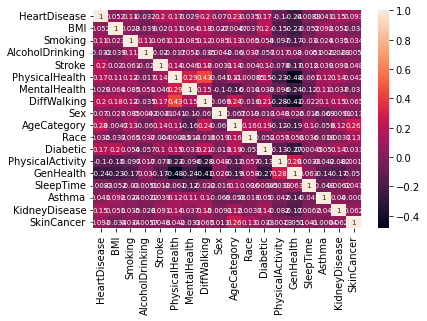

Top 3 Absolute Correlations
PhysicalHealth  GenHealth      0.482697
                DiffWalking    0.428373
DiffWalking     GenHealth      0.413797
dtype: float64


In [4]:
from pylab import rcParams
import seaborn as sns

#returns diagonal and lower triangular pairs
def get_unwanted_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

#returns top n correlated pairs
def get_top_correlations(df_corr, n=5):
    corr_pairs = df_corr.abs().unstack()
    labels_to_drop = get_unwanted_pairs(df) #to get diagonal and lower triangular pairs
    corr_pairs = corr_pairs.drop(labels=labels_to_drop).sort_values(ascending=False)
    return corr_pairs[0:n]

#plot Heatmap & show top n correlated pairs
def plot_correlation(data):
   
    # init figure size
    rcParams['figure.figsize'] = 12, 12
    figure = plt.figure()
    df_corr = df.corr()
    sns.heatmap(df_corr, annot=True, annot_kws={'size': 7})
    plt.show()
    #print(df_corr)
    print("Top 3 Absolute Correlations")
    print(get_top_correlations(df_corr, 3))
    figure.savefig('corr.png')


features = df_cleaned.iloc[:,:]

# plot correlation & densities
plot_correlation(features)


No strong correlation between features to feature or to the target observed. All correlation coefficients are <0.5.
Therefore, no features in the original dataset will be dropped when train the models

#### 5.3 Balancing Dataset

In [5]:
#checking imbalace in data
HeartDisease_yes_count = df_cleaned['HeartDisease'].value_counts()[0]
HeartDisease_no_count = df_cleaned['HeartDisease'].value_counts()[1]
print('HeartDisease "Yes" count : {0}'.format(HeartDisease_yes_count))
print('HeartDisease "No" count : {0}'.format(HeartDisease_no_count))
yes_to_no_ratio = (HeartDisease_yes_count/HeartDisease_no_count)
print('Yes to No ratio : 1 : {0:.2f}'.format(yes_to_no_ratio))


HeartDisease "Yes" count : 292422
HeartDisease "No" count : 27373
Yes to No ratio : 1 : 10.68


As we can see the dataset is highly imbalanced ('Yes' to 'No' ratio is 1:10.68 for label HeartDisease). So we have decided to make the dataset balanced using Nearmiss algorithm so that our models will be reliable. Nearmiss is an undersampling algorithm. If there are two near points for majority and minority classes, the algorithm simply excludes the one from the majority class and ensures that the balance is preserved. We use type-1 Nearmiss algorithm that selects only those majority class examples that have a minimum distance to three minority class instances, specified by the n_neighbors argument.

In [6]:
#balancing data using Nearmiss algorithm
from imblearn.under_sampling import NearMiss

df_features = df_cleaned.iloc[:,1:]
df_label = df_cleaned["HeartDisease"]
nm = NearMiss(version=1, n_neighbors=3)
x_nm, y_nm = nm.fit_resample(df_features, df_label)
y_nm.groupby(y_nm).count()

HeartDisease
0    27373
1    27373
Name: HeartDisease, dtype: int64

The data is balanced now (equal number of Yes and No for the targe).
Afterwards, we can use the train_test_split method to divide our data into training and test data.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_nm, y_nm, random_state=42)

### <b>6. K-Nearest Neighbors Model</b>

The K-Nearest Neighbours model can only receive categorical info of data type float/int, so the different sets of categories should be mapped to a number. The following code can execute the above:

#### 6.1 Finding optimum value of K with Elbow Method 

Now that the data has been divided into training and test data, we have to find out the optimum value for K that would have good accuracy and produce last error.

Text(0, 0.5, 'Error Rate')

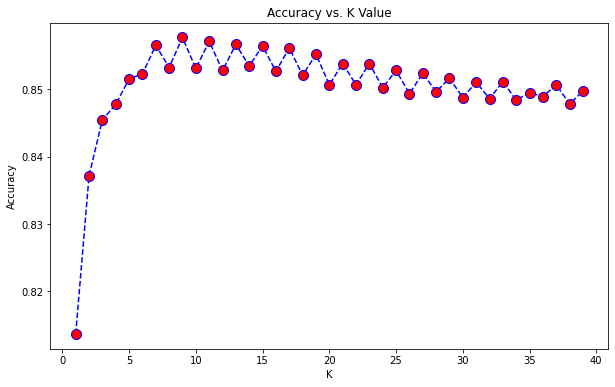

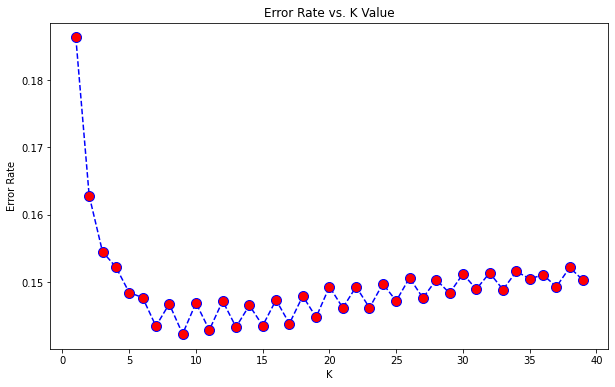

In [8]:
accuracy = []
error_rate = []
# This takes some time to run
for i in range(1,40): 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test) 
 acc_score = accuracy_score(y_test, pred_i)
 accuracy.append(acc_score) 
 error_rate.append(np.mean(pred_i != y_test)) 
 
#plotting accuracy score Vs K value 
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

#plotting error rate Vs K value  
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
 

It's obeservable that even numbers get lower accuracy because of tiebreakers. From the graph, the optimal value of K found to be 9 as it produce best accuracy and the least error rate.

#### 6.2 Training the Model with optimum K value
Now that we found the optimum K value, the KNN model can now be fit with the training data with K = 9. The duration of training is also shown.

In [9]:
knn = KNeighborsClassifier(n_neighbors=9)

#start of training
start = timer()

knn.fit(x_train.values, y_train)

#end of training
end = timer()

#print duration
print("Time Duration:")
print(timedelta(seconds=end-start))


Time Duration:
0:00:00.006770


#### 6.3 Prediction and testing with KNN Model

The KNN model has now been trained with the training data. The test data under the features can now be used to see if it can predict the test data under the labels accurately. This can be shown using the acccuracy_score method. A value closer to 1 means that the predicted values from our model accurately represent the actual data.

In [10]:
#start of training
start = timer()

y_pred_knn = knn.predict(x_test.values)

#end of training
end = timer()

#print duration
print(f'Time Duration: \t\t{timedelta(seconds=end-start)}')

#accuracy metrics
print(f'Accuracy score: \t{accuracy_score(y_test, y_pred_knn)}')

Time Duration: 		0:00:00.708657
Accuracy score: 	0.8576751662161175


The study also provides a section where the model will take one sample to predict their likelyhood of heart disease.

In [11]:
testPred = [[24.00,  #BMI
                1,   #Smoking
                0,   #AlcoholDrinking
                1,   #Stroke
                3,   #PhysicalHealth
                16,  #MentalHeatlh
                0,   #DiffWalking
                0,   #Sex
                10,  #AgeCategory
                5,   #Race
                1,   #Diabetic
                1,   #PhysicalActivity
                0,   #GenHealth
                5,   #Sleeptime
                1,   #Asthma
                0,   #KidneyDisease
                1    #SkinCancer  
                ]]

showPred = knn.predict(testPred)

showPred

array([1], dtype=int64)

As with the data above, we can see that as a person goes up in age, their risk of heart disease goes up. It is especially prominent at the age range of 45-49 (AgeCategory = 5), where the graph's slop starts getting significant steeper from the previous section.

### <b>7. Decision Tree Model</b>

#### 7.1 Finding the optimum level of depth for the decision tree model

Similar to the KNN model, the data can be used to create a decision tree to assist in making business rules. We have decided to find out the optimum depth for best accuracy by iteratively variying the tree depth from 1 to 15

Text(0, 0.5, 'Accuracy')

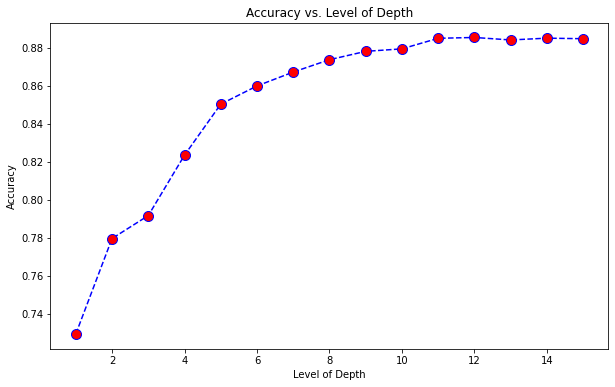

In [12]:
accuracy = []
# This takes some time to run
for i in range(1,16): 
 dec_tree = DecisionTreeClassifier(max_depth = i)
 dec_tree.fit(x_train, y_train)
 pred_i = dec_tree.predict(x_test) 
 acc_score = accuracy_score(y_test, pred_i)
 accuracy.append(acc_score) 

#plotting accuracy score Vs Level of Depth
plt.figure(figsize=(10,6))
plt.plot(range(1,16),accuracy,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. Level of Depth')
plt.xlabel('Level of Depth')
plt.ylabel('Accuracy')


The optimum depth for best accuracy was oversed to be 11 (accuracy : 88.5 %). 

#### 7.2 Training the Model with optimum level of depth

The decision tree model will be training with max_depth = 11.

In [13]:
dec_tree = DecisionTreeClassifier(max_depth = 11)

#start of training
start = timer()

dec_tree.fit(x_train, y_train)

#end of training
end = timer()

#print duration
print("Time Duration:")
print(timedelta(seconds=end-start))

Time Duration:
0:00:11.450275


#### 7.3 Pediction and testing with decision tree model
Now that the Decision Tree model has been fitted with the data, the test data will now be used to see if the decision tree can accurately predict the test outcome.

In [14]:
#start of training
start = timer()

dec_tree.fit(x_train.values, y_train)
y_pred_tree = dec_tree.predict(x_test.values)

#end of training
end = timer()

#print duration
print("Time Duration:")
print(timedelta(seconds=end-start))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_tree))

Time Duration:
0:00:11.367069
Accuracy Score:
0.8848542412508219


In [15]:
testPred = [[24.00,  #BMI
                1,   #Smoking
                0,   #AlcoholDrinking
                1,   #Stroke
                3,   #PhysicalHealth
                16,  #MentalHeatlh
                0,   #DiffWalking
                0,   #Sex
                10,  #AgeCategory
                5,   #Race
                1,   #Diabetic
                1,   #PhysicalActivity
                0,   #GenHealth
                5,   #Sleeptime
                1,   #Asthma
                0,   #KidneyDisease
                1    #SkinCancer  
                ]]

showPred = dec_tree.predict(testPred)

showPred

array([1], dtype=int64)

#### 7.4 Visualisation of decision tree

The Decision Tree can be visualized with the following code:

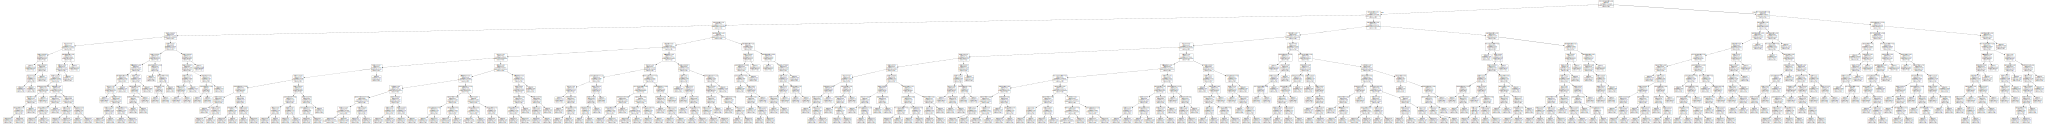

In [16]:
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dec_tree, out_file=None, class_names=True, feature_names= x_train.columns))

For a decision tree of depth 10, the first parameter it looks at is Physical Health. The Physical Health feature describes how many days for the past 30 days did the person not feel good (0-30). The decision tree node splits at the point of where the person has felt good for the last 30 days (which means a 0 in this metric) or not. The root node is the parameter that best splits the data provided, which means physical health is the metric that is checked first and can best determine whether a person is at risk or not according to the data.

### <b>8. Conclusion</b>

#### KNN Model

Different values ok K produce different accuracy score for KNN. The challenge with KNN model is finding the optimum K value. Too low K values has poor accuracy and lead to misclassification when outliers are present in the data. So, we had to iteratively try each K values ranging from 1 to 40 and analyse the results using elbow method. It was observed that K less than 5 produce poor accuracy (<85 %). However, setting too high K value also has it's demerits. Since in KNN computation is done to find out the nearest neighbours during prediction, it's computationally expensive to have too large K value. Also, with the help of elbow method, we observed that beyond K > 9 accuracy does not improve much. This effect could be due to underfitting.

KNN in general is not recommended for too large data set since It needs to store all the data and then makes decision only at run time (computationally expensive) Our data set was in the medium range (54K samples after data balancing) and we did not face much issues due to lack of computational power. The duration took for training is only 0.7sec and even less for testing.  

#### Decision Tree

The decision tree can grow very large when the number of features are high. It also takes a lot of computational power if do not specify the max depth. We ran iterations with level of depth ranging from 1 to 15 and found out the optimum depth for best accuracy. 

The decision tree found to yield higher accuracy than KNN (at the elbow point) however longer processing time is required (11.6 sec when level of depth = 11). This is understandable because when the complexity of the tree increases, naturally longer time is required for computation. Compared to KNN Decision tees can be visualised and easily understood (When the features are 3 or more, KNN is difficult to be visualised). It was observed that when level of depth increased even higher (>15) the accuracy of the model reduced. This phenomenon occurs due to overfitting. When the level of depth increases, the tree captures more information about the data and fit perfectly well to the training data. The model loses it flexibility to generalise to the test data and accuracy get reduced.

#### What have we learned:

1) <b>Selecting appropriate dataset:</b> We learned how to choose appropriate data set for classification algorithms. Initially our thought was to choose another dataset that has shows resale price over time depending on various other factors. But we realised eventually that, that data set is not appropriate for classification algorithms since the outcome is time dependent.

2) <b>Feature correlation:</b> Since our data had 17 features,  we decided to check some related features can be dropped without compromising on the accuracy. We learned how to do Pearson corelation during the process. However, the features turned out have no strong correlation and we decided to keep all the features in the original dataset.

3) <b>Imabalanced Data and Prediction biasness</b>. KNN is susceptible to prediction biasness when used with an imbalanced dataset as the nature of its algorithm will always favour the majority class. Hence, it is important balance out the dataset via undersampling or oversampling. We got high accuracy score (90%) with imbalanced data which was due to prediction biasness. So we decided to balance the data with Nearmiss Algorithm.

3) <b>Finding the optimum K value for KNN:</b> We learned how to use elbow method to find the optimum K value and why is it important to choose it properly. Tool low or too high could compromise accuracy of the algorithm. The impact of noise (outliers) is high when K is too low and that will reduce accuracy. On the other hand, when K is too high, the bias increases and accuracy get reduced. High K value also has computational cost.

4) <b>Impact of level of depth on decision tree:</b> Decision tree requires a lot of computational power when the level of depth increases. The level of the depth can't be set to maximum as well because that could cause overfitting and reduce the accuracy. So, the maximum level depth need to be specified for least computational cost and best accuracy.

4) <b>Advantageous and disadvantageous of Decision Tree and KNN </b> KNN is a simple algorithm and easy to implement. KNN is in fact do not learn during the training or create a faction from the training data so new data can be added without impacting model. However, KNN do the computations at run time and become computationally expensive when K is high. It is not suitable for large dataset due to the same reason. It's also sensitive to noise or outliers. Decision tree is easy to visualise and understand. But requires high computational power as the complexity increases. It also becomes less accurate due to overfitting when level of depth is too high.




